# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
minmax = MinMaxScaler()
# Standardize features
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [3]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [4]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [5]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# SVM_Linear

In [6]:
time1_svm_l_0 = datetime.datetime.now()

svm_l_0 = SVC(kernel="linear", random_state=None, gamma='auto', C=1,probability=True)
model_svm_l_0 = svm_l_0.fit(X_train, y_train)
y_svm_l_0 = model_svm_l_0.predict(X_test)
y_probs_svm_l_0 = model_svm_l_0.predict_proba(X_test)[:, 1]
time2_svm_l_0 = datetime.datetime.now()
print_score(y_test,y_svm_l_0,time1_svm_l_0 ,time2_svm_l_0)

comfusion matrix = 
[[ 480 2400]
 [2365 1848]]

accuracy_score =  0.32821091216692516

completeness =  0.4386422976501306
contamination =  0.5649717514124294

precision score =  0.4350282485875706
recall score =  0.4386422976501306

F1 score =  0.4368277981326084

time span=  0:02:23.273748


In [7]:
time1_svm_l_1 = datetime.datetime.now()

svm_l_1 = SVC(kernel="linear", random_state=None, gamma='auto', C=1,probability=True)
model_svm_l_1 = svm_l_1.fit(X_std_train, y_train)
y_svm_l_1 = model_svm_l_1.predict(X_std_test)
y_probs_svm_l_1 = model_svm_l_1.predict_proba(X_std_test)[:, 1]
time2_svm_l_1 = datetime.datetime.now()
print_score(y_test,y_svm_l_1,time1_svm_l_1 ,time2_svm_l_1)

comfusion matrix = 
[[2788   92]
 [ 110 4103]]

accuracy_score =  0.9715212181023545

completeness =  0.9738903394255874
contamination =  0.021930870083432658

precision score =  0.9780691299165674
recall score =  0.9738903394255874

F1 score =  0.975975261655566

time span=  0:01:04.409660


In [8]:
time1_svm_l_2 = datetime.datetime.now()

svm_l_2 = SVC(kernel="linear", random_state=None, gamma='auto', C=10,probability=True)
model_svm_l_2 = svm_l_2.fit(X_std_train, y_train)
y_svm_l_2 = model_svm_l_2.predict(X_std_test)
y_probs_svm_l_2 = model_svm_l_2.predict_proba(X_std_test)[:, 1]
time2_svm_l_2 = datetime.datetime.now()
print_score(y_test,y_svm_l_2,time1_svm_l_2 ,time2_svm_l_2)

comfusion matrix = 
[[2783   97]
 [ 129 4084]]

accuracy_score =  0.968137600451149

completeness =  0.9693804889627344
contamination =  0.023200191341784263

precision score =  0.9767998086582157
recall score =  0.9693804889627344

F1 score =  0.973076006671432

time span=  0:02:04.053058


In [9]:
time1_svm_l_3 = datetime.datetime.now()

svm_l_3 = SVC(kernel="linear", random_state=None, gamma='auto', C=0.1,probability=True)
model_svm_l_3 = svm_l_3.fit(X_std_train, y_train)
y_svm_l_3 = model_svm_l_3.predict(X_std_test)
y_probs_svm_l_3 = model_svm_l_3.predict_proba(X_std_test)[:, 1]
time2_svm_l_3 = datetime.datetime.now()
print_score(y_test,y_svm_l_3,time1_svm_l_3 ,time2_svm_l_3)

comfusion matrix = 
[[2781   99]
 [  80 4133]]

accuracy_score =  0.9747638516847597

completeness =  0.9810111559458818
contamination =  0.02339319470699433

precision score =  0.9766068052930057
recall score =  0.9810111559458818

F1 score =  0.9788040260509178

time span=  0:00:24.629452


In [10]:
time1_svm_l_4 = datetime.datetime.now()

svm_l_4 = SVC(kernel="linear", random_state=None, gamma='auto', C=100,probability=True)
model_svm_l_4 = svm_l_4.fit(X_std_train, y_train)
y_svm_l_4 = model_svm_l_4.predict(X_std_test)
y_probs_svm_l_4 = model_svm_l_4.predict_proba(X_std_test)[:, 1]
time2_svm_l_4 = datetime.datetime.now()
print_score(y_test,y_svm_l_4,time1_svm_l_4 ,time2_svm_l_4)

comfusion matrix = 
[[2784   96]
 [ 160 4053]]

accuracy_score =  0.9639080783871422

completeness =  0.9620223118917636
contamination =  0.023138105567606652

precision score =  0.9768618944323934
recall score =  0.9620223118917636

F1 score =  0.9693853145180579

time span=  0:15:18.586348


In [11]:
time1_svm_l_5 = datetime.datetime.now()

svm_l_5 = SVC(kernel="linear", random_state=None, gamma=0.01, C=10,probability=True)
model_svm_l_5 = svm_l_5.fit(X_std_train, y_train)
y_svm_l_5 = model_svm_l_5.predict(X_std_test)
y_probs_svm_l_5 = model_svm_l_5.predict_proba(X_std_test)[:, 1]
time2_svm_l_5 = datetime.datetime.now()
print_score(y_test,y_svm_l_5,time1_svm_l_5 ,time2_svm_l_5)

comfusion matrix = 
[[2783   97]
 [ 129 4084]]

accuracy_score =  0.968137600451149

completeness =  0.9693804889627344
contamination =  0.023200191341784263

precision score =  0.9767998086582157
recall score =  0.9693804889627344

F1 score =  0.973076006671432

time span=  0:02:08.903676


In [12]:
time1_svm_l_6 = datetime.datetime.now()

svm_l_6 = SVC(kernel="linear", random_state=None, gamma=0.001, C=10,probability=True)
model_svm_l_6 = svm_l_6.fit(X_std_train, y_train)
y_svm_l_6 = model_svm_l_6.predict(X_std_test)
y_probs_svm_l_6 = model_svm_l_6.predict_proba(X_std_test)[:, 1]
time2_svm_l_6 = datetime.datetime.now()
print_score(y_test,y_svm_l_6,time1_svm_l_6 ,time2_svm_l_6)

comfusion matrix = 
[[2783   97]
 [ 129 4084]]

accuracy_score =  0.968137600451149

completeness =  0.9693804889627344
contamination =  0.023200191341784263

precision score =  0.9767998086582157
recall score =  0.9693804889627344

F1 score =  0.973076006671432

time span=  0:02:04.901589


In [13]:
time1_svm_l_7 = datetime.datetime.now()

svm_l_7 = SVC(kernel="linear", random_state=None, gamma='auto', C=10,class_weight="balanced",probability=True)
model_svm_l_7 = svm_l_7.fit(X_std_train, y_train)
y_svm_l_7 = model_svm_l_7.predict(X_std_test)
y_probs_svm_l_7 = model_svm_l_7.predict_proba(X_std_test)[:, 1]
time2_svm_l_7 = datetime.datetime.now()
print_score(y_test,y_svm_l_7,time1_svm_l_7 ,time2_svm_l_7)

comfusion matrix = 
[[2816   64]
 [ 196 4017]]

accuracy_score =  0.9633441421119413

completeness =  0.9534773320674104
contamination =  0.0156824307767704

precision score =  0.9843175692232295
recall score =  0.9534773320674104

F1 score =  0.9686520376175548

time span=  0:01:58.464696


In [14]:
time1_svm_l_8 = datetime.datetime.now()

svm_l_8 = SVC(kernel="linear", random_state=None, gamma='auto', C=1,class_weight="balanced",probability=True)
model_svm_l_8 = svm_l_8.fit(X_std_train, y_train)
y_svm_l_8 = model_svm_l_8.predict(X_std_test)
y_probs_svm_l_8 = model_svm_l_8.predict_proba(X_std_test)[:, 1]
time2_svm_l_8 = datetime.datetime.now()
print_score(y_test,y_svm_l_8,time1_svm_l_8 ,time2_svm_l_8)

comfusion matrix = 
[[2808   72]
 [ 140 4073]]

accuracy_score =  0.9701113774143522

completeness =  0.9667695229052932
contamination =  0.017370325693606754

precision score =  0.9826296743063933
recall score =  0.9667695229052932

F1 score =  0.9746350801627184

time span=  0:00:38.577022


In [15]:
time1_svm_l_9 = datetime.datetime.now()

svm_l_9 = SVC(kernel="linear", random_state=None, gamma='auto', C=0.1,class_weight="balanced",probability=True)
model_svm_l_9 = svm_l_9.fit(X_std_train, y_train)
y_svm_l_9 = model_svm_l_9.predict(X_std_test)
y_probs_svm_l_9 = model_svm_l_9.predict_proba(X_std_test)[:, 1]
time2_svm_l_9 = datetime.datetime.now()
print_score(y_test,y_svm_l_9,time1_svm_l_9 ,time2_svm_l_9)

comfusion matrix = 
[[2808   72]
 [ 110 4103]]

accuracy_score =  0.9743408994783589

completeness =  0.9738903394255874
contamination =  0.017245508982035928

precision score =  0.9827544910179641
recall score =  0.9738903394255874

F1 score =  0.9783023366714353

time span=  0:00:25.750711


In [16]:
time1_svm_l_10 = datetime.datetime.now()

svm_l_10 = SVC(kernel="linear", random_state=None, gamma='auto', C=0.01,class_weight="balanced",probability=True)
model_svm_l_10 = svm_l_10.fit(X_std_train, y_train)
y_svm_l_10 = model_svm_l_10.predict(X_std_test)
y_probs_svm_l_10 = model_svm_l_10.predict_proba(X_std_test)[:, 1]
time2_svm_l_10 = datetime.datetime.now()
print_score(y_test,y_svm_l_10,time1_svm_l_10 ,time2_svm_l_10)

comfusion matrix = 
[[2800   80]
 [ 101 4112]]

accuracy_score =  0.9744818835471591

completeness =  0.9760265843816758
contamination =  0.019083969465648856

precision score =  0.9809160305343512
recall score =  0.9760265843816758

F1 score =  0.9784651992861393

time span=  0:00:31.506809


In [17]:
time1_svm_l_11 = datetime.datetime.now()

svm_l_11 = SVC(kernel="linear", random_state=None, gamma=0.0001, C=0.01,class_weight="balanced",probability=True)
model_svm_l_11 = svm_l_11.fit(X_std_train, y_train)
y_svm_l_11 = model_svm_l_11.predict(X_std_test)
y_probs_svm_l_11 = model_svm_l_11.predict_proba(X_std_test)[:, 1]
time2_svm_l_11 = datetime.datetime.now()
print_score(y_test,y_svm_l_11,time1_svm_l_11 ,time2_svm_l_11)

comfusion matrix = 
[[2800   80]
 [ 101 4112]]

accuracy_score =  0.9744818835471591

completeness =  0.9760265843816758
contamination =  0.019083969465648856

precision score =  0.9809160305343512
recall score =  0.9760265843816758

F1 score =  0.9784651992861393

time span=  0:00:31.350286


## Feature Importance

<IPython.core.display.Javascript object>


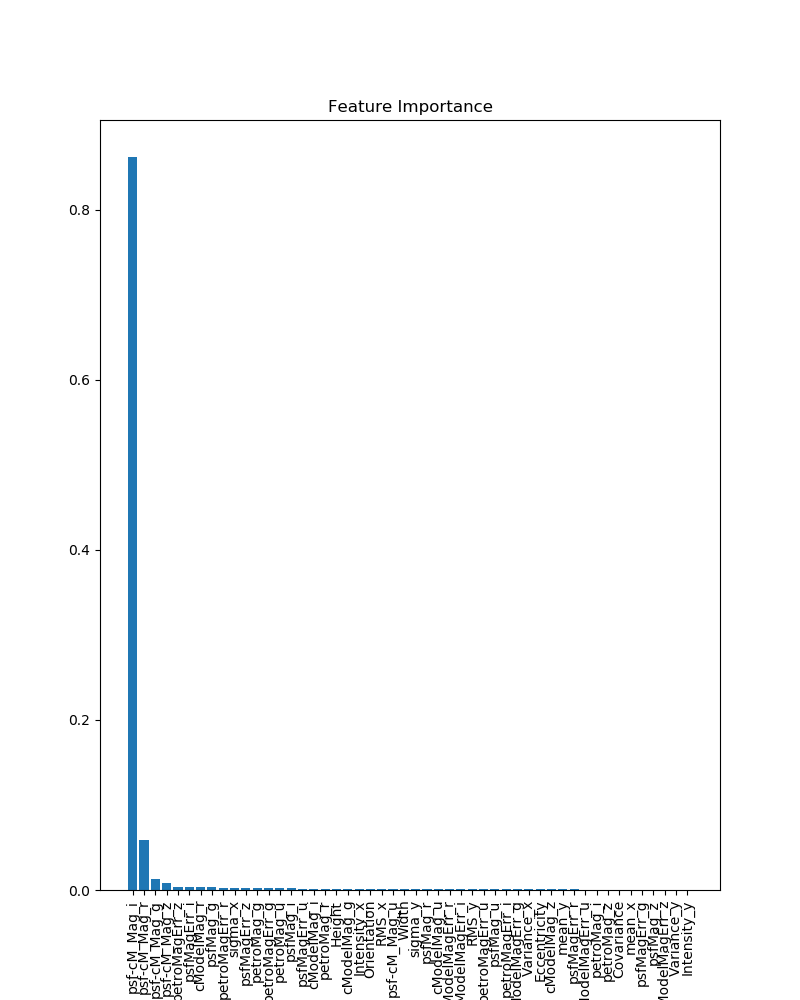

In [102]:
# Calculate feature importances
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,10))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

### Cross-validation

In [31]:
scores = cross_val_score(tree_ent, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.97886332 0.98027243 0.9769845  0.96991067 0.977433   0.96897038
 0.9783733  0.97320169 0.97508228 0.97273155]
Average cross-validation score: 0.98


,0
0,0.978863
1,0.980272
2,0.976984
3,0.969911
4,0.977433
5,0.968970
6,0.978373
7,0.973202
8,0.975082
9,0.972732


### Confusion Matrix

<IPython.core.display.Javascript object>


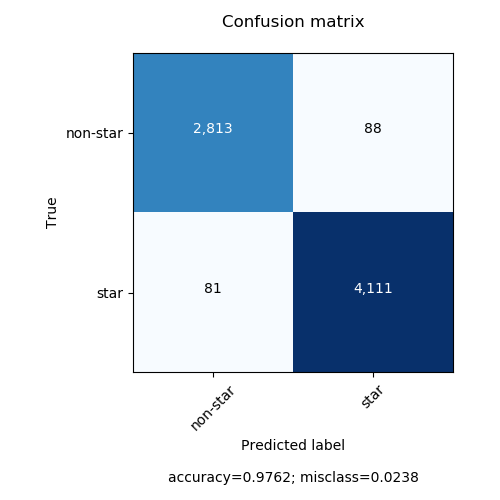

In [47]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_pred_tree_ent)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [18]:
score_svm_l_0 = score(y_test,y_svm_l_0,time1_svm_l_0,time2_svm_l_0)
score_svm_l_1 = score(y_test,y_svm_l_1,time1_svm_l_1 ,time2_svm_l_1)
score_svm_l_2 = score(y_test,y_svm_l_2,time1_svm_l_2 ,time2_svm_l_2)
score_svm_l_3 = score(y_test,y_svm_l_3,time1_svm_l_3 ,time2_svm_l_3)
score_svm_l_4 = score(y_test,y_svm_l_4,time1_svm_l_4 ,time2_svm_l_4)
score_svm_l_5 = score(y_test,y_svm_l_5,time1_svm_l_5 ,time2_svm_l_5)
score_svm_l_6 = score(y_test,y_svm_l_6,time1_svm_l_6 ,time2_svm_l_6)
score_svm_l_7 = score(y_test,y_svm_l_7,time1_svm_l_7 ,time2_svm_l_7)
score_svm_l_8 = score(y_test,y_svm_l_8,time1_svm_l_8 ,time2_svm_l_8)
score_svm_l_9 = score(y_test,y_svm_l_9,time1_svm_l_9 ,time2_svm_l_9)
score_svm_l_10 = score(y_test,y_svm_l_10,time1_svm_l_10 ,time2_svm_l_10)
score_svm_l_11 = score(y_test,y_svm_l_11,time1_svm_l_11 ,time2_svm_l_11)

In [19]:
m1_t = pd.DataFrame({
 'accuracy' : [score_svm_l_0[1],score_svm_l_1[1],score_svm_l_2 [1],score_svm_l_3[1],score_svm_l_4[1],score_svm_l_5[1],score_svm_l_6[1],score_svm_l_7[1],score_svm_l_8[1],score_svm_l_9[1],score_svm_l_10[1],score_svm_l_11[1]],
 'completeness' : [score_svm_l_0[2],score_svm_l_1[2],score_svm_l_2 [2],score_svm_l_3[2],score_svm_l_4[2],score_svm_l_5[2],score_svm_l_6[2],score_svm_l_7[2],score_svm_l_8[2],score_svm_l_9[2],score_svm_l_10[2],score_svm_l_11[2]],
 'contamination' : [score_svm_l_0[3],score_svm_l_1[3],score_svm_l_2 [3],score_svm_l_3[3],score_svm_l_4[3],score_svm_l_5[3],score_svm_l_6[3],score_svm_l_7[3],score_svm_l_8[3],score_svm_l_9[3],score_svm_l_10[3],score_svm_l_11[3]],
 'precision' : [score_svm_l_0[4],score_svm_l_1[4],score_svm_l_2 [4],score_svm_l_3[4],score_svm_l_4[4],score_svm_l_5[4],score_svm_l_6[4],score_svm_l_7[4],score_svm_l_8[4],score_svm_l_9[4],score_svm_l_10[4],score_svm_l_11[4]],
 'recall' : [score_svm_l_0[5],score_svm_l_1[5],score_svm_l_2 [5],score_svm_l_3[5],score_svm_l_4[5],score_svm_l_5[5],score_svm_l_6[5],score_svm_l_7[5],score_svm_l_8[5],score_svm_l_9[5],score_svm_l_10[5],score_svm_l_11[5]],
 'F1 score' : [score_svm_l_0[6],score_svm_l_1[6],score_svm_l_2 [6],score_svm_l_3[6],score_svm_l_4[6],score_svm_l_5[6],score_svm_l_6[6],score_svm_l_7[6],score_svm_l_8[6],score_svm_l_9[6],score_svm_l_10[6],score_svm_l_11[6]],
 'time span' : [score_svm_l_0[7],score_svm_l_1[7],score_svm_l_2 [7],score_svm_l_3[7],score_svm_l_4[7],score_svm_l_5[7],score_svm_l_6[7],score_svm_l_7[7],score_svm_l_8[7],score_svm_l_9[7],score_svm_l_10[7],score_svm_l_11[7]]
                })

m1_t.rename(index = {0: "score_svm_l_0", 
                     1: "score_svm_l_1",
                     2: "score_svm_l_2",
                     3: "score_svm_l_3",
                     4: "score_svm_l_4",
                     5: "score_svm_l_5",
                     6: "score_svm_l_6",
                     7: "score_svm_l_7",
                     8: "score_svm_l_8",
                     9: "score_svm_l_9",
                     10: "score_svm_l_10",
					 11: "score_svm_l_11"
                    },inplace = True)
m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,time span
score_svm_l_0,0.328211,0.438642,0.564972,0.435028,0.438642,0.436828,00:02:23.273748
score_svm_l_1,0.971521,0.973890,0.021931,0.978069,0.973890,0.975975,00:01:04.409660
score_svm_l_2,0.968138,0.969380,0.023200,0.976800,0.969380,0.973076,00:02:04.053058
score_svm_l_3,0.974764,0.981011,0.023393,0.976607,0.981011,0.978804,00:00:24.629452
score_svm_l_4,0.963908,0.962022,0.023138,0.976862,0.962022,0.969385,00:15:18.586348
score_svm_l_5,0.968138,0.969380,0.023200,0.976800,0.969380,0.973076,00:02:08.903676
score_svm_l_6,0.968138,0.969380,0.023200,0.976800,0.969380,0.973076,00:02:04.901589
score_svm_l_7,0.963344,0.953477,0.015682,0.984318,0.953477,0.968652,00:01:58.464696
score_svm_l_8,0.970111,0.966770,0.017370,0.982630,0.966770,0.974635,00:00:38.577022
score_svm_l_9,0.974341,0.973890,0.017246,0.982754,0.973890,0.978302,00:00:25.750711


<IPython.core.display.Javascript object>


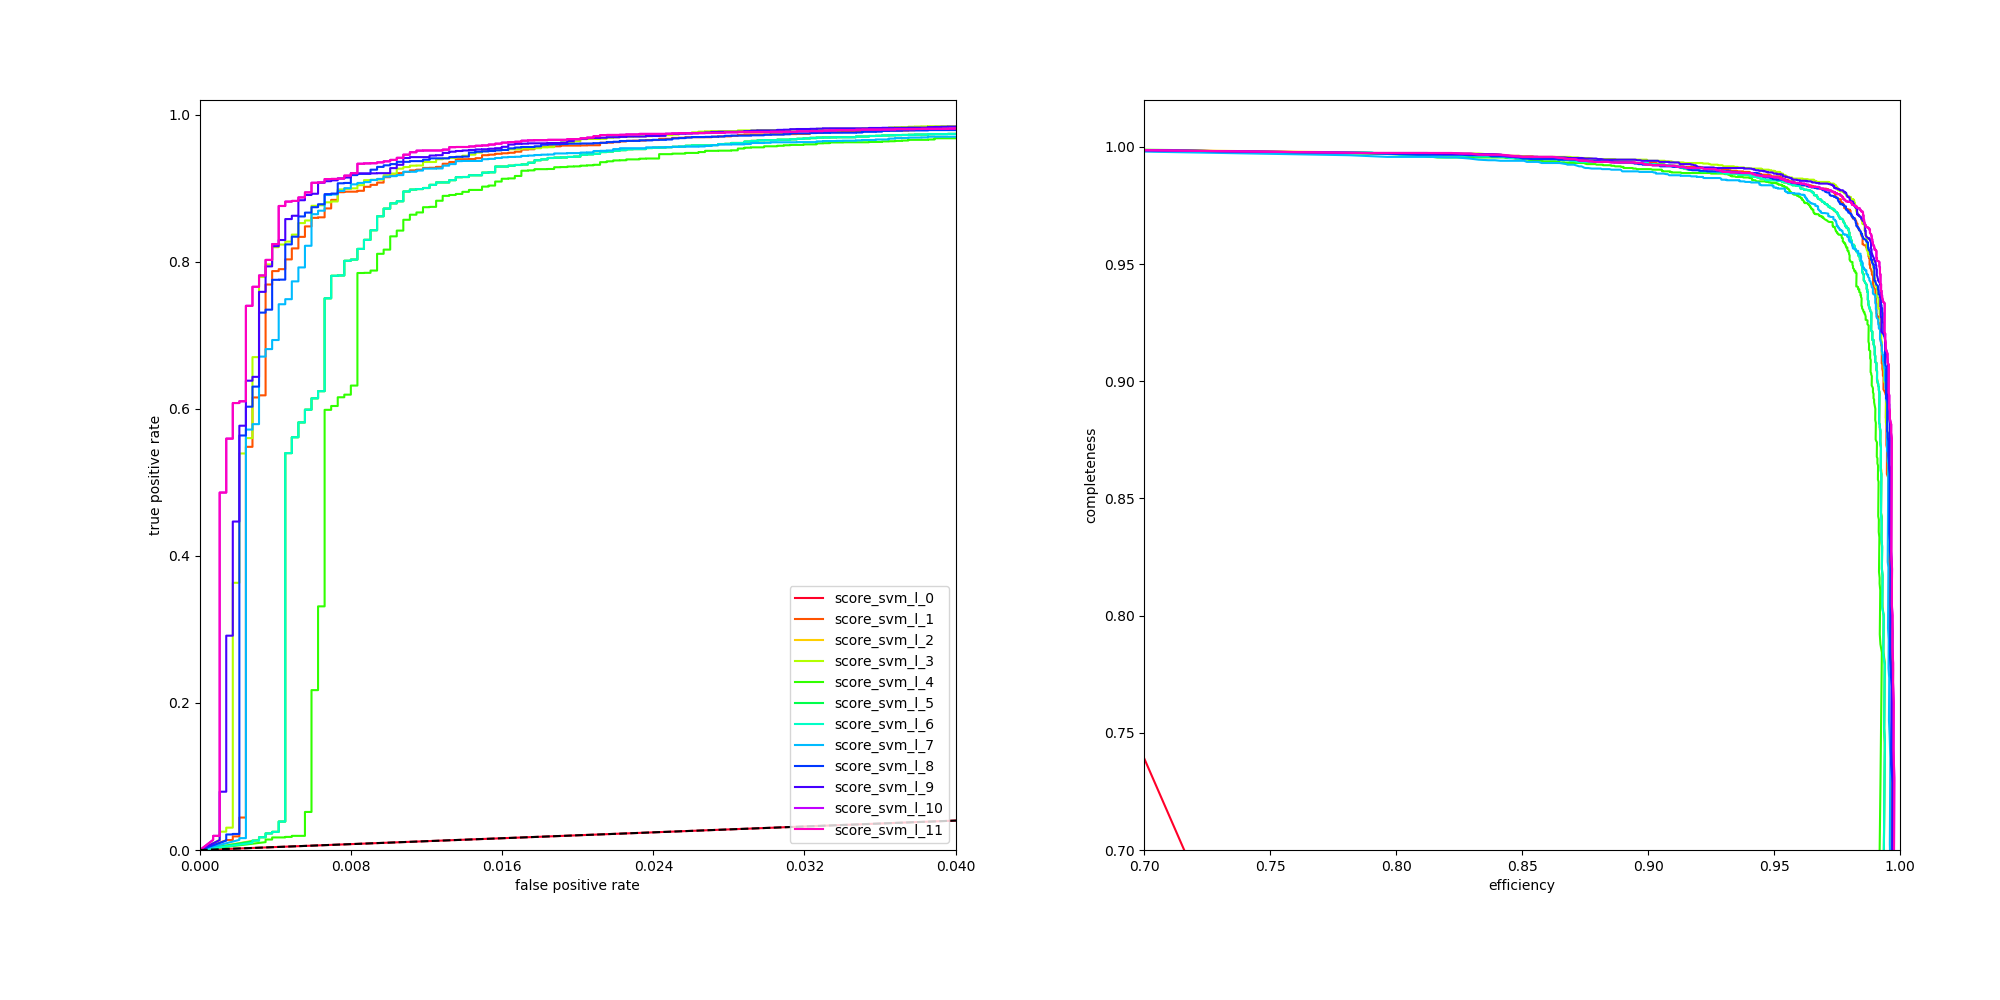

In [20]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_svm_l_0,y_probs_svm_l_1,y_probs_svm_l_2,y_probs_svm_l_3,y_probs_svm_l_4,y_probs_svm_l_5,y_probs_svm_l_6,y_probs_svm_l_7,y_probs_svm_l_8,y_probs_svm_l_9,y_probs_svm_l_10,y_probs_svm_l_11]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()